In [11]:
import random
import time
import importlib
import game
importlib.reload(game)
import gameEnvF 
importlib.reload(gameEnvF)
from game import ColorableCliqueGame
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from gameEnvF import draw, triangle_huristic, alphabetaMaxDepth, alphabetaMove, random_move, getPsuedoLegalStates, getLegalStatesAndTag, alphabeta, getNextBestMoves
print(tf.__version__)

colors = [(255,100,100), (100,100,255)]
env = ColorableCliqueGame(300,300,6,colors)
#env.close()

2.8.0


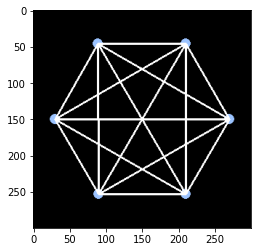

In [2]:
draw(env)

In [3]:
env = ColorableCliqueGame(300,300,6,colors)

[ 0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  1]
0.0


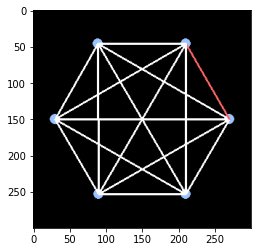

In [4]:
moves = env.getMoves()
random_move(env)
print(env.state1D())
print(alphabetaMaxDepth(env, -9999, 9999, 3, triangle_huristic))
draw(env)

(False, 1)
-1
0.0


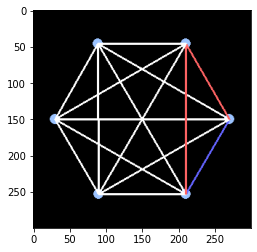

In [6]:
md = alphabetaMove(env, 3, triangle_huristic)
print(md)
print(env.winner)
print(alphabetaMaxDepth(env, -9999, 9999, 3, triangle_huristic))
draw(env)

1


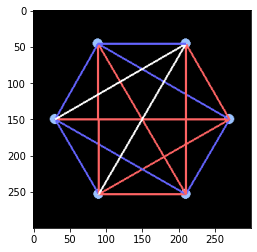

In [7]:
while(env.winner == -1):
    alphabetaMove(env,1, triangle_huristic)
print(env.winner)
draw(env)

In [8]:
#envt = ColorableCliqueGame(300,300,6,colors)
def test(test_num, random_moves, depth, huristic_func):
    player0Wins = 0
    player1Wins = 0
    for r in range(test_num):
        envt = ColorableCliqueGame(300,300,6,colors)
        for _ in range(random_moves):
            random_move(envt)
        #print(envt.winner)
        while(envt.winner == -1):
            #print(envt.player)
            alphabetaMove(envt, depth, huristic_func)
        #print(envt.winner)
        if envt.winner == 0:
            player0Wins += 1
        else:
            player1Wins += 1
        if r % 5 == 0:
            print("round ",r)
    print("player0 won :", player0Wins, "player1 won :", player1Wins)

In [9]:
test(10, 1, 5, triangle_huristic)

round  0
round  5
player0 won : 9 player1 won : 1


### Get all possible positions legal and illegal

In [9]:
from game import nCr

allp = getPsuedoLegalStates()
print("size : ", len(allp))

500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000
6500000
7000000
size :  14348907


### Sort the ilegal positions, and create the tag.

In [10]:
import importlib
import game
importlib.reload(game)
from game import ColorableCliqueGame

env = ColorableCliqueGame(300,300,6,colors)

In [113]:
X = getLegalStatesAndTag(allp, 3, triangle_huristic, log=250000)

ab 250000
ab 500000
ab 750000
ab 1000000
ab 1250000
ab 1500000
ab 1750000
ab 2000000
ab 2250000
ab 2500000


KeyboardInterrupt: 

In [ ]:
print(X.shape)
drawIndex = 4300
env = ColorableCliqueGame(300,300,6,colors)
print(X[drawIndex][0], X[drawIndex][1])
print(env.loadfrom1D(X[drawIndex][0]))

print("max min : ",alphabetaMaxDepth(env, 3,-99999, 99999, triangle_huristic))
print("alpha beta : ",alphabeta(env, 3,-99999, 99999, env.player == 0, triangle_huristic))
print(env.state1D())


# [ 1  1  1  1  1 -1  0 -1  0  0  0 -1  0 -1 -1  1] -97.5
# True
# -97.5
# -1

[-1  1  0  0  1 -1  0  1  1  0  1 -1 -1 -1 -1  1] -100
True
max min :  -100
alpha beta :  -100
[-1  1  0  0  1 -1  0  1  1  0  1 -1 -1 -1 -1  1]


In [109]:
# def save(X, name, maxSize):
#     folds = int(X.shape[0] / maxSize)
#     for i in range(folds):
#         sn = name + "_p" + i + ".npy"
#         with open(sn, 'wb') as f:
#             np.save(f, X[i * maxSize: (i+1) * maxSize])
#save(X, "K6D3", 10000)
#import gzip

filename = 'data\K6D3n.npz'
with open(filename, 'wb') as f:
    np.savez_compressed(f, data=X)
    #f.close()
#np.savez_compressed('/tmp/123', a=X)

In [17]:
with open(filename, 'rb') as f:
    a = np.load(f, allow_pickle=True)
    data = a['data']

In [18]:
print(data[0])
print(X[0])

[array([-1,  0,  1,  1,  1,  1,  1,  0, -1,  0,  0, -1, -1, -1, -1,  1],
       dtype=int64)
 -100 -100]
[array([-1,  0,  1,  1,  1,  1,  1,  0, -1,  0,  0, -1, -1, -1, -1,  1],
       dtype=int64)
 -100 -100]
